In [11]:
%pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [41]:

data = pd.read_csv('./test_data/ArimaV2Dataset.csv')
data['date'] = pd.to_datetime(data["date"])
data = data.set_index('date')
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


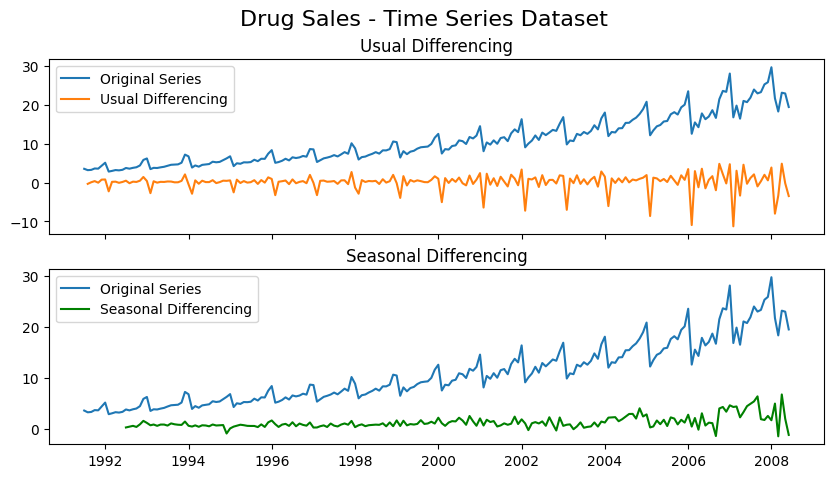

In [42]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data["value"], label='Original Series')
axes[0].plot(data["value"].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data["value"], label='Original Series')
axes[1].plot(data["value"].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [43]:
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [68]:
size = int(len(data) - 40)
train, test = data['value'][0:size], data['value'][size:len(data)]

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=262.098, Time=0.99 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=347.735, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=292.391, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=263.921, Time=0.26 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=271.261, Time=0.05 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=263.311, Time=0.44 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=262.754, Time=0.91 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=265.988, Time=0.15 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=264.319, Time=1.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=288.933, Time=0.15 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=263.978, Time=0.36 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=264.052, Time=0.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=344.021, Time=0.10 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=262.220, Time=0.30 sec
 ARIMA(2,1,0)(0,1,1)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -127.049
Date:                            Fri, 22 Mar 2024   AIC                            262.098
Time:                                    15:22:09   BIC                            274.167
Sample:                                07-01-1991   HQIC                           267.001
                                     - 02-01-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2161      0.093     -2.316      0.021      -0.399      -0.033
ma.L1         -0.6876      0.060    -11.398      0.000      -0.806      -0.569
ma.S.L12      -0.3457      0.070     -4.913      0.000      -0.484      -0.208
sigma2         0.3098      0.031      9.998      0.000       0.249       0.371
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                14.20
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               3.92   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
data.shape

(204, 1)

2005-02-01 00:00:00
{"1107216000000":null,"1109635200000":15.1517797841,"1112313600000":14.6675765282,"1114905600000":16.0155478013,"1117584000000":15.8354801715,"1120176000000":17.1143253111,"1122854400000":16.9793646531,"1125532800000":17.6728779212,"1128124800000":18.4852723986,"1130803200000":18.8734755299,"1133395200000":20.4620596424,"1136073600000":22.2982888735,"1138752000000":14.4552297481,"1141171200000":16.788188075,"1143849600000":16.4475004629,"1146441600000":17.764465132,"1149120000000":17.5910964896,"1151712000000":18.8684943107,"1154390400000":18.7338463464,"1157068800000":19.4272920569,"1159660800000":20.2397011302,"1162339200000":20.627901108,"1164931200000":22.2164859018,"1167609600000":24.0527149857,"1170288000000":16.2096558921,"1172707200000":18.5426142121,"1175385600000":18.2019266016,"1177977600000":19.5188912703,"1180656000000":19.345522628,"1183248000000":20.6229204491,"1185926400000":20.4882724847,"1188604800000":21.1817181953,"1191196800000":21.9941272685,"1

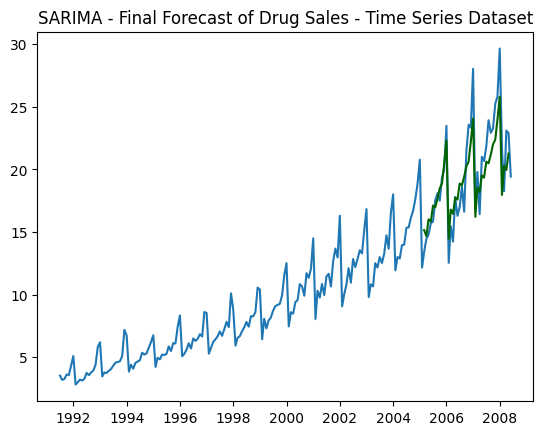

In [75]:
# Forecast
n_periods = 40
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')
print(train.index[-1])
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
print(fitted_series.to_json())
# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [71]:
error = np.sqrt(mean_squared_error(test,fitted))
print('Test RMSE: %.4f' % error)

Test RMSE: 1.9163
